# import packages.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Check the contents of the file.

In [2]:
train_data = pd.read_csv('~/input/titanic/train.csv')
test_data = pd.read_csv('~/input/titanic/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Analyze data.

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train_data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Edvardsson, Mr. Gustaf Hjalmar",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [8]:
test_data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Borebank, Mr. John James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##  Pclass

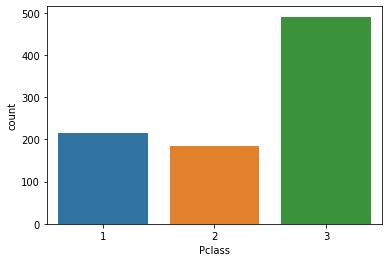

In [11]:
sns.countplot(train_data['Pclass'])

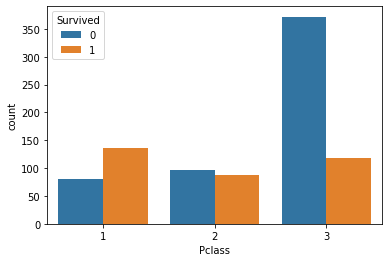

In [12]:
sns.countplot(x='Pclass', data=train_data, hue='Survived')

## Sex

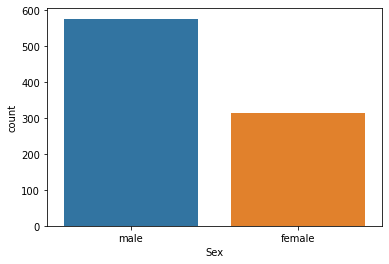

In [13]:
sns.countplot(train_data['Sex'])

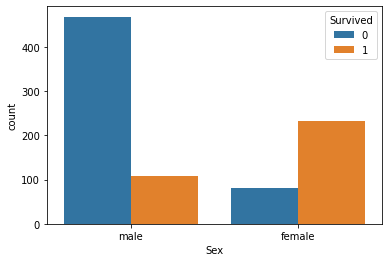

In [14]:
sns.countplot(x='Sex', data=train_data, hue='Survived')

## Age

In [15]:
age_filled_data = train_data.fillna({'Age': 99})

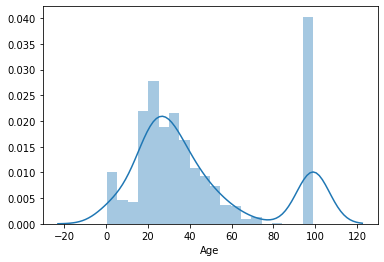

In [16]:
sns.distplot(age_filled_data['Age'], bins=20)

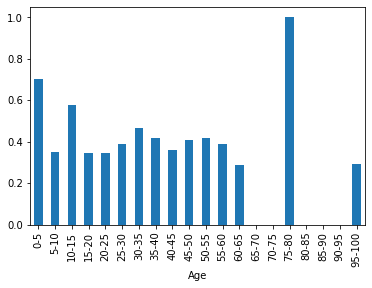

In [497]:
# Binning ages every 5 years
bin_age = 5
age_bins_list = [-1] + list(range(bin_age, 101, bin_age))
age_bins_label = [ "{0}-{1}".format(age, age + bin_age) for age in list(range(0, 100,bin_age)) ]
age_bins = pd.cut(age_filled_data['Age'],  bins=age_bins_list, labels=age_bins_label)

# Group by age and calculate average
age_grouped_data = age_filled_data.groupby(age_bins).mean()
age_grouped_data['Survived'].plot(kind='bar')

In [18]:
#left = age_grouped_data.index
#height = age_grouped_data['Survived']
#plt.xlabel('Age')
#plt.ylabel('Survival rate')
#plt.bar(left, height)

## SibSp (Number of siblings / spouses aboard the Titanic)

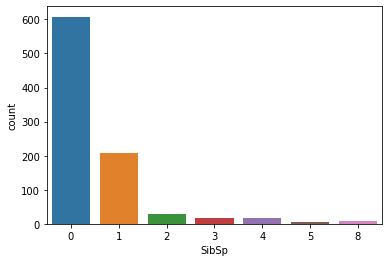

In [19]:
sns.countplot(train_data['SibSp'])

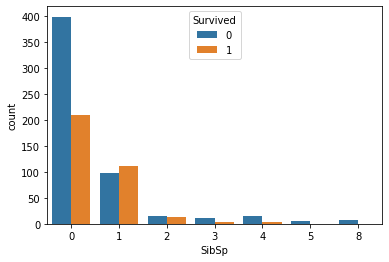

In [20]:
sns.countplot(x='SibSp', data=train_data, hue='Survived')

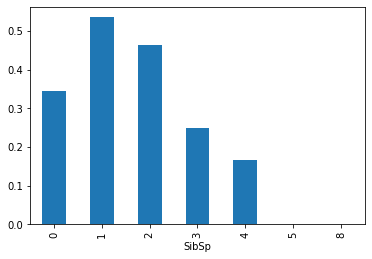

In [21]:
sibsp_mean = train_data.groupby('SibSp').mean()
sibsp_mean['Survived'].plot(kind='bar')

## Parch (Number of parents / children aboard the Titanic)

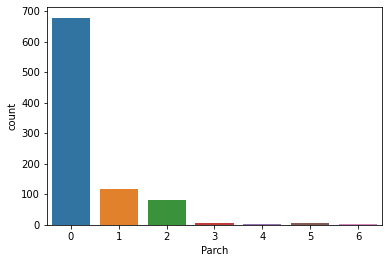

In [22]:
sns.countplot(train_data['Parch'])

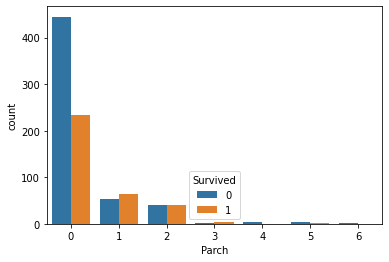

In [23]:
sns.countplot(x='Parch', data=train_data, hue='Survived')

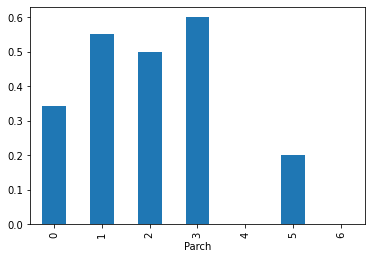

In [24]:
parch_mean = train_data.groupby('Parch').mean()
parch_mean['Survived'].plot(kind='bar')

## Passenger fare

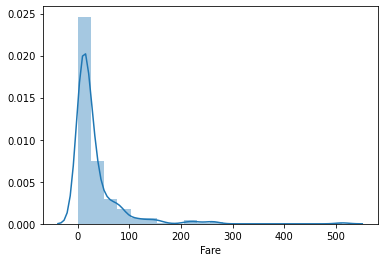

In [25]:
sns.distplot(train_data['Fare'], bins=20)

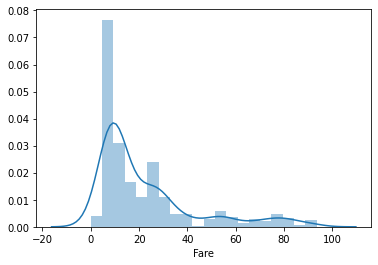

In [26]:
low_fare_data = train_data[train_data['Fare'] < 100]
sns.distplot(low_fare_data['Fare'], bins=20)

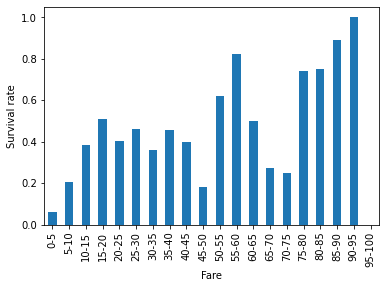

In [227]:
# Binning fare every 5
bin_fare = 5
fare_bins_list =  [-1] + list(range(bin_fare, 101, bin_fare))
fare_bins_label_list =  list(range(0, 100, bin_fare))
fare_bins_label = [ '{0}-{1}'.format(fare, fare + bin_fare) for fare in (fare_bins_label_list) ]
fare_bins = pd.cut(train_data['Fare'],  bins=fare_bins_list, labels=fare_bins_label)

# Group by Fare and calculate average
fare_grouped_data = train_data.groupby(fare_bins).mean()
plt.ylabel('Survival rate')
fare_grouped_data['Survived'].plot(kind='bar')

## Embarked

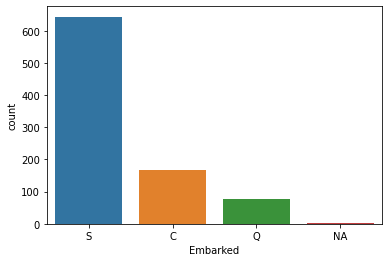

In [28]:
embarked_fillna_data = train_data.fillna({'Embarked': 'NA'})
sns.countplot(embarked_fillna_data['Embarked'])

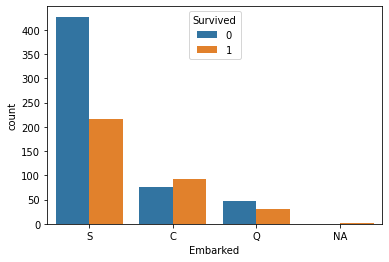

In [29]:
sns.countplot(x='Embarked', data=embarked_fillna_data, hue='Survived')

# Analyze relationship between parameters

## Pclass and Sex

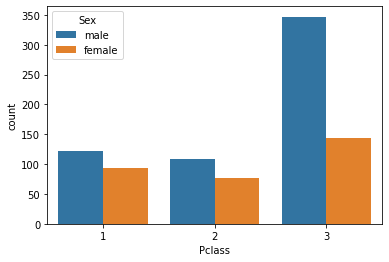

In [30]:
sns.countplot(x='Pclass', data=train_data, hue='Sex')

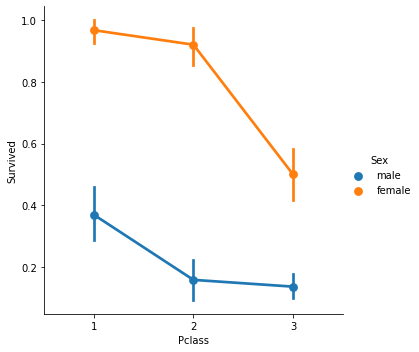

In [31]:
sns.catplot(x='Pclass',y='Survived', hue='Sex', data=train_data, kind='point')

## Pclass and Age

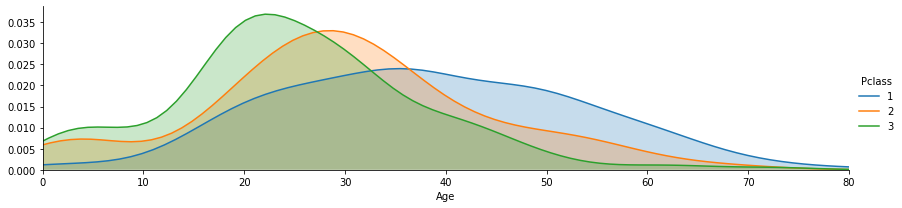

In [154]:
grid = sns.FacetGrid(train_data, hue='Pclass', aspect=4)
grid.map(sns.kdeplot,'Age',shade= True)
max_age = train_data['Age'].max()
grid.set(xlim=(0, max_age))
grid.add_legend()

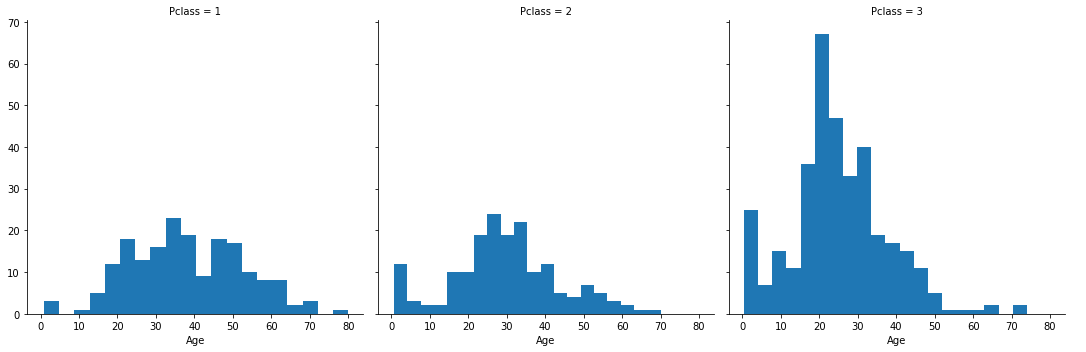

In [155]:
grid = sns.FacetGrid(train_data, col='Pclass', height=5)
grid.map(plt.hist, 'Age',  bins=20)
grid.add_legend()

## Pclass and SibSp

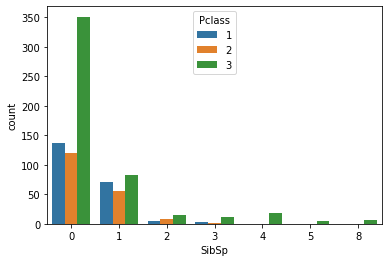

In [156]:
sns.countplot(x='SibSp', data=train_data, hue='Pclass')

## Pclass ans Parch

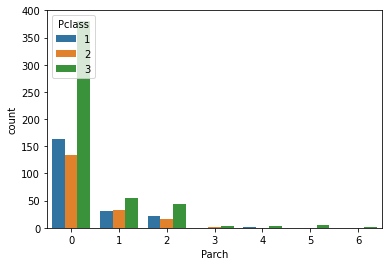

In [157]:
sns.countplot(x='Parch', data=train_data, hue='Pclass')

## Pclass and Fare

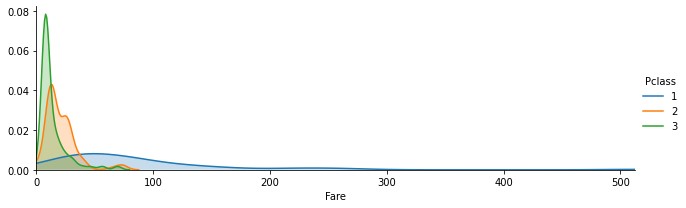

In [158]:
grid = sns.FacetGrid(train_data, hue='Pclass', height=3, aspect=3)
grid.map(sns.kdeplot,'Fare',shade= True)
max_fare = train_data['Fare'].max()
grid.set(xlim=(0, max_fare))
grid.add_legend()

## Sex and Age

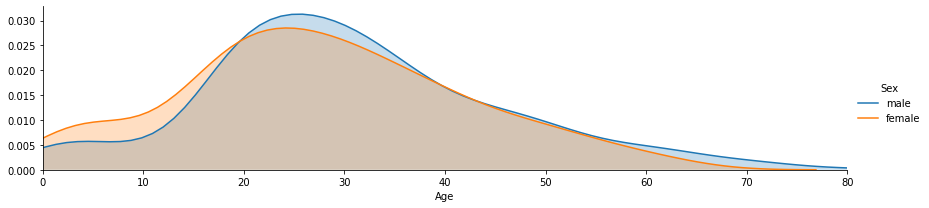

In [159]:
grid = sns.FacetGrid(train_data, hue='Sex', aspect=4)
grid.map(sns.kdeplot,'Age',shade= True)
max_age = train_data['Age'].max()
grid.set(xlim=(0, max_age))
grid.add_legend()

## SibSp and Parch

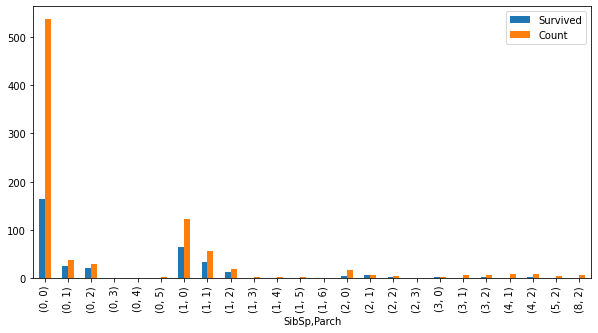

In [160]:
sibsp_parch_group = train_data.groupby(['SibSp', 'Parch'])
survived = sibsp_parch_group['Survived'].sum()
count = sibsp_parch_group['Survived'].count()

sibsp_parch_count = pd.DataFrame(index=survived.index)
sibsp_parch_count['Survived'] = survived
sibsp_parch_count['Count'] = count
sibsp_parch_count.plot.bar(figsize=(10, 5))

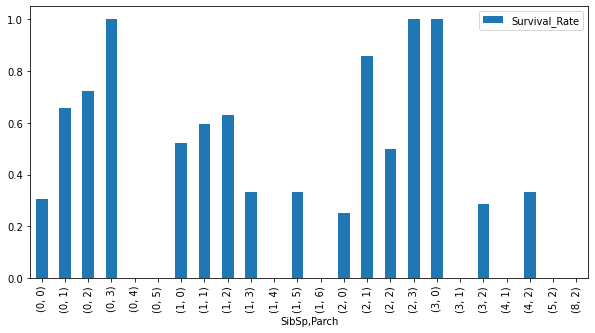

In [161]:
sibsp_parch_rate = pd.DataFrame(index=survived.index)
sibsp_parch_rate['Survival_Rate'] = survived / count
sibsp_parch_rate.plot.bar(figsize=(10, 5))

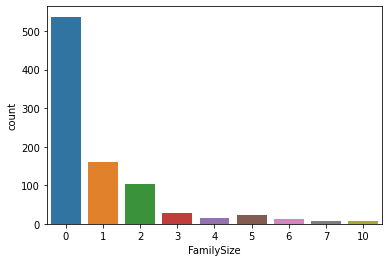

In [162]:
family_size_data = pd.DataFrame(index=train_data.index)
family_size_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
family_size_data['Survived'] = train_data['Survived']

sns.countplot(family_size_data['FamilySize'])

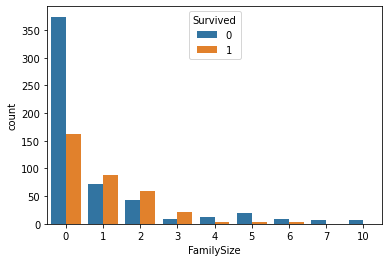

In [163]:
sns.countplot(x='FamilySize', data=family_size_data, hue='Survived')

# Check the importance of features

## Convert categorical variables

In [252]:
from sklearn.preprocessing import LabelEncoder

train_all = train_data.copy()
test_all = test_data.copy()

train_all.fillna({'Age': 99, 'Ticket': 'Na', 'Fare': 999, 'Cabin': 'Na', 'Embarked': 'Na'}, inplace=True)
test_all.fillna({'Age': 99, 'Ticket': 'Na', 'Fare': 999, 'Cabin': 'Na', 'Embarked': 'Na'}, inplace=True)

#train_x['Test'] = 0
#test_x['Test'] = 1

all_data = pd.concat([train_all, test_all])

for column in ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']:
    #print(column)
    encoder = LabelEncoder()
    encoder.fit(all_data[column])
    #all_data[column] = encoder.transform(all_data[column])
    train_all[column] = encoder.transform(train_all[column])
    test_all[column] = encoder.transform(test_all[column])
    
#all_data.info()
#all_data.head()
train_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,155,1,22.0,1,0,720,7.2500,185,3
1,2,1,1,286,0,38.0,1,0,816,71.2833,106,0
2,3,1,3,523,0,26.0,0,0,914,7.9250,185,3
3,4,1,1,422,0,35.0,1,0,65,53.1000,70,3
4,5,0,3,22,1,35.0,0,0,649,8.0500,185,3


## Predict using all input data

Score:0.8193


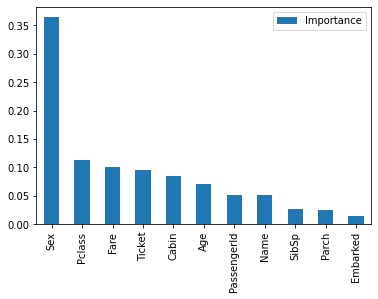

In [253]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
#from sklearn.metrics import log_loss, accuracy_score

train_y = train_all['Survived']
train_x = train_all.drop(columns=['Survived'])
test_x = test_all

#for train_index, test_index in kf.split(train_x):
#    tr_x, tr_y = train_x.iloc[train_index], train_y.iloc[train_index]
#    ts_x, ts_y = train_x.iloc[test_index], train_y.iloc[test_index]
#    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
#    model.fit(tr_x, tr_y)
#    ts_pred = model.predict(ts_x)
#    score = accuracy_score(ts_y, ts_pred)
#    print(score)
    
# Trainning with cross validation and and score calculation
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
result = cross_val_score(model, train_x, train_y, cv=kf, scoring='accuracy')
print('Score:{0:.4f}'.format(result.mean()))

# Evaluation of features
#model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(train_x, train_y)

importances = model.feature_importances_
columns = train_x.columns

feature_importances = pd.DataFrame(importances, index=train_x.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances.plot.bar()

# Preprocess and Create features

In [1384]:
train_data = pd.read_csv('~/input/titanic/train.csv')
test_data = pd.read_csv('~/input/titanic/test.csv')

train_all = train_data.copy(deep=True)
test_all = test_data.copy(deep=True)

train_all['Test'] = 0
test_all['Test'] = 1
#test_all['Survived'] = -1

all_data = pd.concat([train_all, test_all], ignore_index=True)
all_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Test
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,1


## Name

In [1385]:
all_data["Title"] = all_data['Name'].str.extract("([A-Za-z]+)\.")
pd.crosstab(all_data['Title'], [all_data['Sex'], all_data['Pclass']])

Sex      female          male          
Pclass        1   2    3    1    2    3
Title                                  
Capt          0   0    0    1    0    0
Col           0   0    0    4    0    0
Countess      1   0    0    0    0    0
Don           0   0    0    1    0    0
Dona          1   0    0    0    0    0
Dr            1   0    0    5    2    0
Jonkheer      0   0    0    1    0    0
Lady          1   0    0    0    0    0
Major         0   0    0    2    0    0
Master        0   0    0    5   11   45
Miss         60  50  150    0    0    0
Mlle          2   0    0    0    0    0
Mme           1   0    0    0    0    0
Mr            0   0    0  159  150  448
Mrs          77  55   65    0    0    0
Ms            0   1    1    0    0    0
Rev           0   0    0    0    8    0
Sir           0   0    0    1    0    0

In [1386]:
all_data['Title'] = all_data['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], 'Upper')
all_data['Title'] = all_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
all_data['Title'] = all_data['Title'].replace(['Mme'], 'Mrs')

train_temp = all_data[all_data['Test'] == 0]
train_temp[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Upper,0.347826
2,Mr,0.156673


In [1387]:
title_map = {'Mr': 1, 'Upper': 2, 'Master': 3, 'Miss': 4, 'Mrs': 5}
all_data['Title'] = all_data['Title'].map(title_map)
all_data['Title'] = all_data['Title'].fillna(0)

## Sex

In [1388]:
all_data['Sex'] = all_data['Sex'].replace({'male':0, 'female': 1})

## Age

In [1389]:
median_age = all_data['Age'].median()
all_data.fillna({'Age': median_age}, inplace=True)

def generations(age):
    if age <= 6: return 0
    if age <= 18: return 1
    if age <= 60: return 2
    return 3
    
all_data['Generation'] = all_data['Age'].map(lambda age : generations(age))

train_temp = all_data[all_data['Test'] == 0]
train_temp[['Generation', 'Survived']].groupby(['Generation'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Generation,Survived
0,0,0.702128
1,1,0.402174
2,2,0.365753
3,3,0.227273


In [1390]:
all_data['Child'] = all_data['Age'].map(lambda age : 1 if age <= 6 else 0)

## SibSp & Parch

In [1391]:
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch']

#def family_size(fsize):
#    if fsize == 0: return 0
#    if fsize <= 3: return 1
#    if fsize <= 6: return 2
#    return 3
#all_data['FamilySize'] = all_data['FamilySize'].map(lambda fsize : family_size(fsize))

train_temp = all_data[all_data['Test'] == 0]
train_temp[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [1392]:
all_data['Alone'] = all_data['FamilySize'].map(lambda fsize : 1 if fsize==0 else 0)

train_temp = all_data[all_data['Test'] == 0]
train_temp[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Alone,Survived
0,0,0.505650
1,1,0.303538


## Fare

In [1393]:
median_fare = all_data['Fare'].median()
all_data.fillna({'Fare': median_fare}, inplace=True)
print(median_fare)

def fare_range(fare):
    if fare < 5: return 0
    if fare < 10: return 1
    if fare < 15: return 2
    if fare < 20: return 3
    return 4

all_data['FareRange'] = all_data['Fare'].map(lambda fare : fare_range(fare))

train_temp = all_data[all_data['Test'] == 0]
train_temp[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='Survived', ascending=False)

14.4542


,FareRange,Survived
4,4,0.529255
3,3,0.500000
2,2,0.388430
1,1,0.206250
0,0,0.062500


## Cabin

In [1394]:
all_data["HasCabin"] = all_data['Cabin'].map(lambda cabin : 0 if type(cabin)==float else 1)

train_temp = all_data[all_data['Test'] == 0]
train_temp[['HasCabin', 'Survived']].groupby(['HasCabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,HasCabin,Survived
1,1,0.666667
0,0,0.299854


In [1395]:
all_data['CabinNumber'] = all_data['Cabin'].str.extract("([a-zA-Z])[0-9]+")
all_data.fillna({'CabinNumber': 'Na'}, inplace=True)

train_temp = all_data[all_data['Test'] == 0]
train_temp[['CabinNumber', 'Survived']].groupby(['CabinNumber'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,CabinNumber,Survived
5,F,0.777778
3,D,0.766667
4,E,0.757576
1,B,0.744681
2,C,0.593220
0,A,0.466667
7,Na,0.301013
6,G,0.285714


In [1396]:
cabin_map = {'G': 0, 'Na': 1, 'A': 2, 'C': 3, 'B': 4, 'E': 5, 'D': 6, 'F': 7}
all_data['CabinNumber'] = all_data['CabinNumber'].map(cabin_map)
#all_data['CabinNumber'] = all_data['CabinNumber'].fillna(0)

#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#encoder.fit(all_data['CabinNumber'])
#all_data['CabinNumber'] = encoder.transform(all_data['CabinNumber'])

## Embarked

In [1397]:
all_data.fillna({'Embarked': 'S'}, inplace=True)
all_data['Embarked2'] = all_data['Embarked'] .replace({'S':0, 'Q': 1, 'C': 2})

train_temp = all_data[all_data['Test'] == 0]
train_temp[['Embarked2', 'Survived']].groupby(['Embarked2'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked2,Survived
2,2,0.553571
1,1,0.389610
0,0,0.339009


## Family Death

In [1410]:
all_data['LastName'] = all_data['Name'] .map(lambda name: name.split(",")[0])

all_data['FamilyDeath'] = np.nan
col_no = all_data.columns.get_loc('FamilyDeath')

for i in range(len(all_data)):
    
    if all_data.iloc[i]['FamilySize'] > 0: 
        
        last_name = all_data.iloc[i]['LastName']
        family_size = all_data.iloc[i]['FamilySize']

        temp = pd.concat([all_data.iloc[:i], all_data.iloc[i+1:]])

        family = temp[(temp['LastName'] == last_name) & (temp['FamilySize'] == family_size)]
        
        if len(family) == 0:
            continue
        
        all_data.iloc[i, col_no] = family.Survived.mean()
        
        #print("==============================================")
        #print("{0:4d}: {1:s} size={2:d}".format(i, last_name, family_size))
        #print(len(family), family, family['Survived'].mean())
        #all_data.loc[i, 'FamilyDeath'] = family['Survived'].mean()
        #print(all_data.iloc[i, col_no] , family['Survived'].mean())
        
all_data['FamilyDeath'] .fillna(0.5, inplace=True)
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Generation,Child,FamilySize,Alone,FareRange,HasCabin,CabinNumber,Embarked2,LastName,FamilyDeath
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,2,0,1,0,1,0,1,0,Braund,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,2,0,1,0,4,1,3,2,Cumings,0.5
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,2,0,0,1,1,0,1,0,Heikkinen,0.5
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,2,0,1,0,4,1,3,0,Futrelle,0.0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,2,0,0,1,1,0,1,0,Allen,0.5


## Evaluation

Score:0.8350


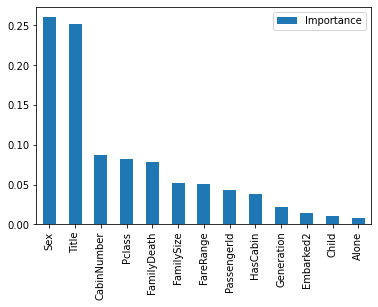

In [1415]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

test_group = all_data.groupby('Test')
train_y = test_group.get_group(0)['Survived']
train_y = train_y.astype({'Survived': int})
drop_columns = ['Survived', 'Test', 'Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'LastName']
train_x = test_group.get_group(0).drop(columns=drop_columns)
test_x = test_group.get_group(1).drop(columns=drop_columns)
    
# Trainning with cross validation and and score calculation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
result = cross_val_score(model, train_x, train_y, cv=kf, scoring='accuracy')
print('Score:{0:.4f}'.format(result.mean()))

# Evaluation of features
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(train_x, train_y)

importances = model.feature_importances_
columns = train_x.columns

feature_importances = pd.DataFrame(importances, index=train_x.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances.plot.bar()

# Drop features

Score:0.8339


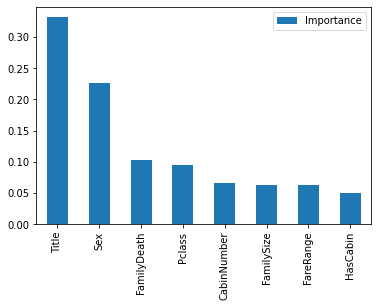

In [1418]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

test_group = all_data.groupby('Test')
train_y = test_group.get_group(0)['Survived']
train_y = train_y.astype({'Survived': int})
drop_columns = [
    'Survived', 'Test', 'Name', 'Age', 'SibSp', 'Parch', 
    'Fare', 'Ticket', 'Fare', 'Cabin', 'Embarked', 
    'PassengerId', 'Generation', 'Embarked2', 'Child', 'Alone', 'LastName']
train_x = test_group.get_group(0).drop(columns=drop_columns)
test_x = test_group.get_group(1).drop(columns=drop_columns)
    
# Trainning with cross validation and and score calculation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
result = cross_val_score(model, train_x, train_y, cv=kf, scoring='accuracy')
print('Score:{0:.4f}'.format(result.mean()))

# Evaluation of features
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(train_x, train_y)

importances = model.feature_importances_
columns = train_x.columns

feature_importances = pd.DataFrame(importances, index=train_x.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances.plot.bar()

In [1419]:
# Prediction
predictions = model.predict(test_x)

# Output result to csv.
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)